#### Mini Project:Email Spam Classification using Linear Regression and Logistic Regression

### Problem Statement
Email spam classification helps filter out unwanted messages using rule-based and machine learning techniques. It analyzes sender details, message content, and authentication protocols to detect and block spam efficiently


### Data Collection
Use the Kaggle Email Spam Classification which contains. Download if from Kaggle
### https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\hemavarshini\archive (6)\emails.csv")

In [3]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
data.ndim

2

In [9]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

#### Handling Missing Data

In [10]:
data.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5167    False
5168    False
5169    False
5170    False
5171    False
Length: 5172, dtype: bool

In [13]:
data.duplicated().sum()

0

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
data = pd.get_dummies(data, drop_first=True)

In [17]:
data

,the,to,ect,and,for,of,a,you,hou,in,...,Email No._Email 990,Email No._Email 991,Email No._Email 992,Email No._Email 993,Email No._Email 994,Email No._Email 995,Email No._Email 996,Email No._Email 997,Email No._Email 998,Email No._Email 999
0,0,0,1,0,0,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,8,13,24,6,6,2,102,1,27,18,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,0,0,0,8,0,0,4,...,False,False,False,False,False,False,False,False,False,False
3,0,5,22,0,5,1,51,2,10,1,...,False,False,False,False,False,False,False,False,False,False
4,7,6,17,1,5,2,57,0,9,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,False,False,False,False,False,False,False,False,False,False
5168,35,27,11,2,6,5,151,4,3,23,...,False,False,False,False,False,False,False,False,False,False
5169,0,0,1,1,0,0,11,0,0,1,...,False,False,False,False,False,False,False,False,False,False
5170,2,7,1,0,2,1,28,2,0,8,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


#### Mean, Median and Mode

In [19]:
# Mean
mean_values = data.mean(numeric_only=True)
print("Mean:", mean_values)

# Median
median_values = data.median(numeric_only=True)
print("Median:", median_values)

# Mode
mode_values = data.mode()
print("Mode:", mode_values)

Mean: the                    6.640565
to                     6.188128
ect                    5.143852
and                    3.075599
for                    3.124710
                         ...   
Email No._Email 995    0.000193
Email No._Email 996    0.000193
Email No._Email 997    0.000193
Email No._Email 998    0.000193
Email No._Email 999    0.000193
Length: 8172, dtype: float64
Median: the                    3.0
to                     3.0
ect                    1.0
and                    1.0
for                    2.0
                      ... 
Email No._Email 995    0.0
Email No._Email 996    0.0
Email No._Email 997    0.0
Email No._Email 998    0.0
Email No._Email 999    0.0
Length: 8172, dtype: float64
Mode:    the  to  ect  and  for  of  a  you  hou  in  ...  Email No._Email 990  \
0    0   0    1    0    1   0  3    0    0   0  ...                False   

   Email No._Email 991  Email No._Email 992  Email No._Email 993  \
0                False                False         

#### Data Analysis and Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

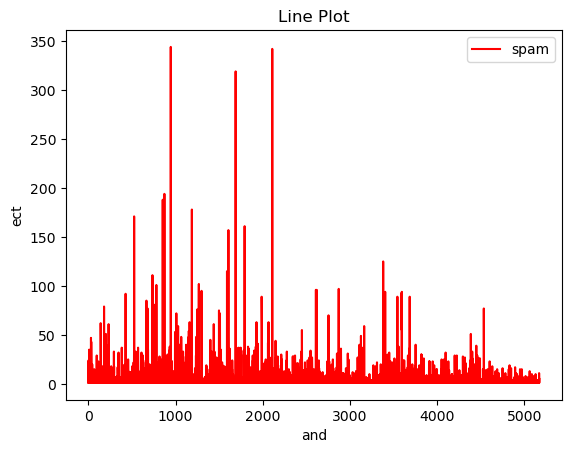

In [21]:
plt.plot(data.index, data['ect'], label='spam', color='r')
plt.title('Line Plot')
plt.xlabel('and')
plt.ylabel('ect')
plt.legend()
plt.show()

#### Scatter Plot

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


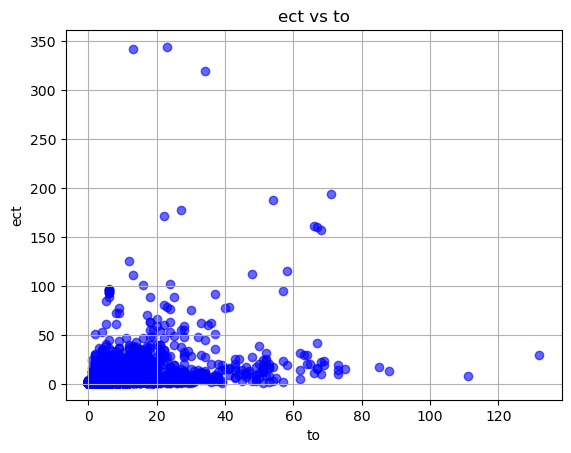

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Dell\Downloads\hemavarshini\archive (6)\emails.csv")

print(data.columns)

plt.scatter(data['to'], data['ect'], color='blue', alpha=0.6)
plt.title("ect vs to")
plt.xlabel("to")
plt.ylabel("ect")
plt.grid(True)
plt.show()

### Bar Chart

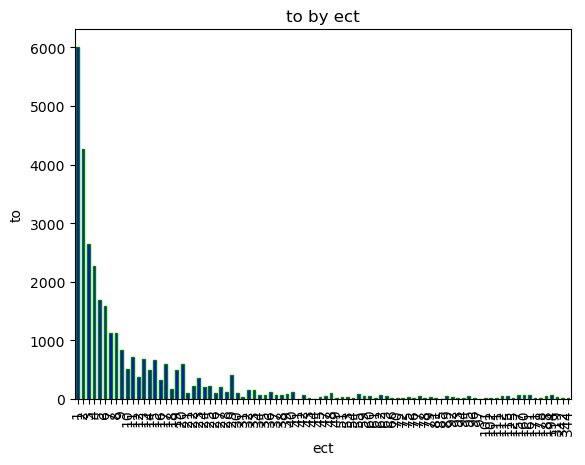

In [23]:
grouped_data = data.groupby('ect')['to'].sum()
grouped_data.plot(kind='bar', color='blue', edgecolor='green')
plt.title("to by ect")
plt.xlabel("ect")
plt.ylabel("to")
plt.show()


### Linear Regression

In [25]:
X = data[['the', 'to', 'ect', 'and', 'for',	'of', 'a', 'you', 'hou']]
y = data['Prediction']

In [26]:
X

,the,to,ect,and,for,of,a,you,hou
0,0,0,1,0,0,0,2,0,0
1,8,13,24,6,6,2,102,1,27
2,0,0,1,0,0,0,8,0,0
3,0,5,22,0,5,1,51,2,10
4,7,6,17,1,5,2,57,0,9
...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0
5168,35,27,11,2,6,5,151,4,3
5169,0,0,1,1,0,0,11,0,0
5170,2,7,1,0,2,1,28,2,0


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
X_train

,the,to,ect,and,for,of,a,you,hou
3581,0,2,1,0,0,0,8,0,0
4302,7,12,25,7,2,2,148,1,14
576,4,7,4,3,2,2,61,3,1
2955,2,2,2,0,2,2,10,0,0
1115,30,25,19,2,7,12,262,7,8
...,...,...,...,...,...,...,...,...,...
4171,0,3,1,3,3,2,32,5,0
599,5,2,1,0,2,1,27,0,0
1361,0,0,1,0,1,0,4,0,0
1547,0,0,1,0,1,0,2,0,0


In [31]:
X_test

,the,to,ect,and,for,of,a,you,hou
1039,2,5,1,4,2,2,107,7,0
893,5,10,1,1,2,0,27,0,0
4617,7,4,2,0,1,3,24,3,3
1905,0,1,2,0,0,0,14,0,1
2026,5,0,1,0,1,0,31,0,0
...,...,...,...,...,...,...,...,...,...
1262,44,33,62,30,39,4,324,18,27
322,5,10,3,8,4,2,189,2,0
3150,3,2,1,1,1,1,14,1,0
2328,17,7,1,1,7,1,59,4,0


In [33]:
y_train

3581    1
4302    0
576     1
2955    1
1115    0
       ..
4171    1
599     0
1361    0
1547    0
4959    0
Name: Prediction, Length: 3103, dtype: int64

In [34]:
y_test

1039    1
893     0
4617    0
1905    0
2026    0
       ..
1262    0
322     1
3150    0
2328    0
4693    0
Name: Prediction, Length: 2069, dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
print(lm.intercept_)

0.28160996922316445


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
the,-0.017358
to,-0.010715
ect,-0.002719
and,0.005321
for,-0.020972
of,0.028950
a,0.002606
you,0.017226
hou,-0.003171


In [41]:
predictions = lm.predict(X_test)

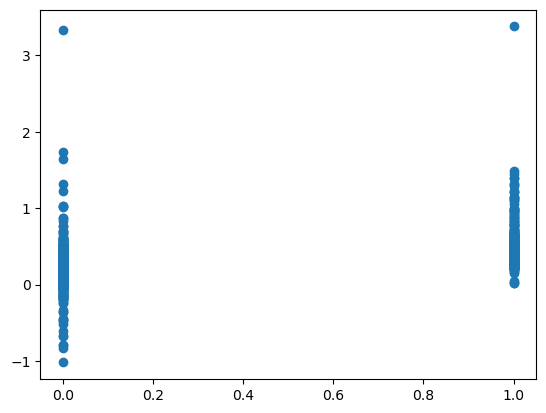

In [43]:
plt.scatter(y_test,predictions)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3208\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


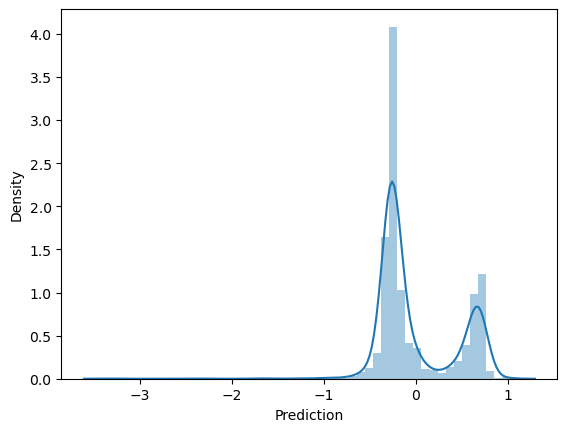

In [45]:
sns.distplot((y_test-predictions),bins=50);

#### Logistic Regression

In [46]:
X = data[['the', 'to', 'ect', 'and', 'for',	'of', 'a', 'you', 'hou']]
y = data['Prediction']

In [47]:
X

,the,to,ect,and,for,of,a,you,hou
0,0,0,1,0,0,0,2,0,0
1,8,13,24,6,6,2,102,1,27
2,0,0,1,0,0,0,8,0,0
3,0,5,22,0,5,1,51,2,10
4,7,6,17,1,5,2,57,0,9
...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0
5168,35,27,11,2,6,5,151,4,3
5169,0,0,1,1,0,0,11,0,0
5170,2,7,1,0,2,1,28,2,0


In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [51]:
X_train

,the,to,ect,and,for,of,a,you,hou
3581,0,2,1,0,0,0,8,0,0
4302,7,12,25,7,2,2,148,1,14
576,4,7,4,3,2,2,61,3,1
2955,2,2,2,0,2,2,10,0,0
1115,30,25,19,2,7,12,262,7,8
...,...,...,...,...,...,...,...,...,...
4171,0,3,1,3,3,2,32,5,0
599,5,2,1,0,2,1,27,0,0
1361,0,0,1,0,1,0,4,0,0
1547,0,0,1,0,1,0,2,0,0


In [52]:
X_test

,the,to,ect,and,for,of,a,you,hou
1039,2,5,1,4,2,2,107,7,0
893,5,10,1,1,2,0,27,0,0
4617,7,4,2,0,1,3,24,3,3
1905,0,1,2,0,0,0,14,0,1
2026,5,0,1,0,1,0,31,0,0
...,...,...,...,...,...,...,...,...,...
1262,44,33,62,30,39,4,324,18,27
322,5,10,3,8,4,2,189,2,0
3150,3,2,1,1,1,1,14,1,0
2328,17,7,1,1,7,1,59,4,0


In [53]:
y_train

3581    1
4302    0
576     1
2955    1
1115    0
       ..
4171    1
599     0
1361    0
1547    0
4959    0
Name: Prediction, Length: 3103, dtype: int64

In [54]:
y_test

1039    1
893     0
4617    0
1905    0
2026    0
       ..
1262    0
322     1
3150    0
2328    0
4693    0
Name: Prediction, Length: 2069, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lm = LogisticRegression()

In [58]:
lm.fit(X_train,y_train)

LogisticRegression()

In [59]:
print(lm.intercept_)

[-0.68018508]


In [60]:
predictions = lm.predict(X_test)

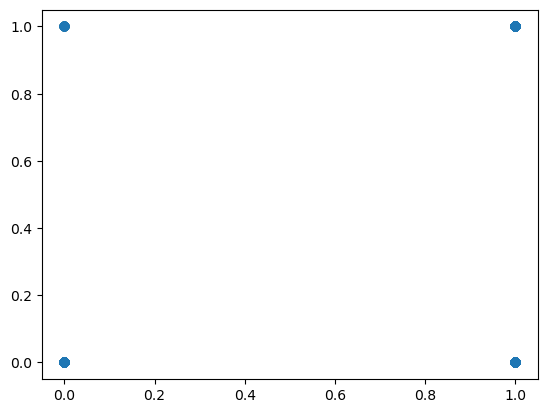

In [62]:
plt.scatter(y_test,predictions)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3208\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


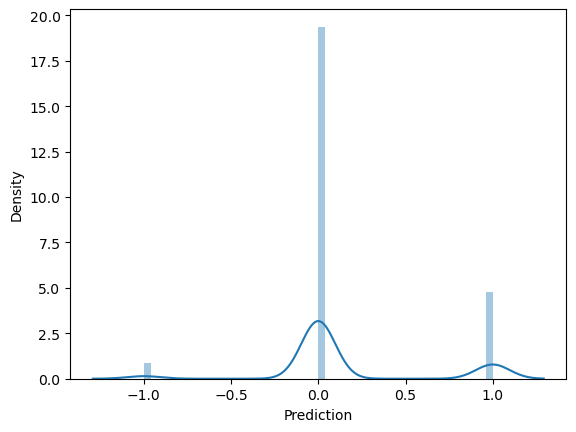

In [63]:
sns.distplot((y_test-predictions),bins=50);